In [1]:
import sympy
sympy.init_printing(use_latex='mathjax')

In [17]:
# define symbols
t, s = sympy.symbols('t, s')
a = sympy.symbols('a', real=True, positive=True)

In [18]:
# Laplace transform formula
f = sympy.exp(-a*t)
f

 -a⋅t
ℯ    

In [19]:
sympy.integrate(f*sympy.exp(-s*t), (t, 0, sympy.oo))

⎧       1                         π
⎪   ─────────      for │arg(s)│ ≤ ─
⎪     ⎛a    ⎞                     2
⎪   s⋅⎜─ + 1⎟                      
⎪     ⎝s    ⎠                      
⎪                                  
⎨∞                                 
⎪⌠                                 
⎪⎮  -a⋅t  -s⋅t                     
⎪⎮ ℯ    ⋅ℯ     dt     otherwise    
⎪⌡                                 
⎪0                                 
⎩                                  

In [5]:
# use library function
sympy.laplace_transform(f, t, s)

⎛  1            ⎞
⎜─────, -a, True⎟
⎝a + s          ⎠

In [6]:
F = sympy.laplace_transform(f, t, s, noconds=True)
F

  1  
─────
a + s

In [7]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)

def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

invL(F)

 -a⋅t     
ℯ    ⋅θ(t)

In [8]:
# theta(t) is the unit step function
sympy.Heaviside(t)

θ(t)

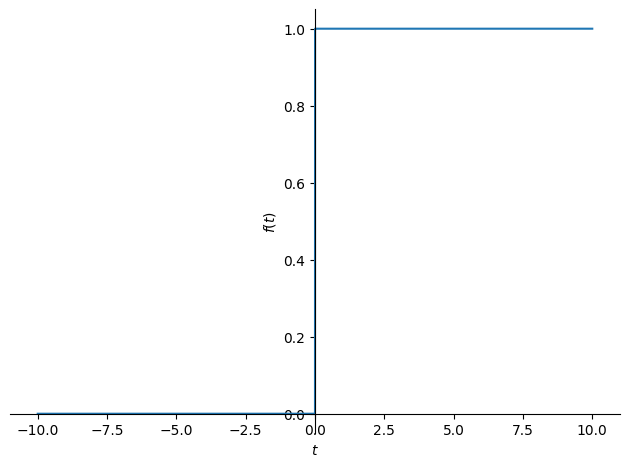

In [9]:
sympy.plot(sympy.Heaviside(t))

In [10]:
invL(F).subs({a: 2})

 -2⋅t     
ℯ    ⋅θ(t)

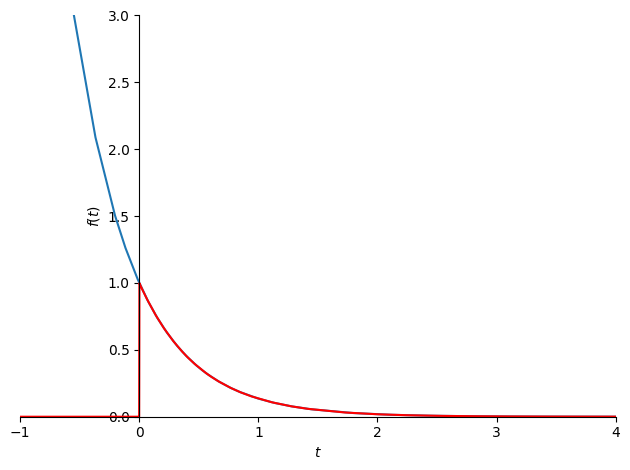

In [11]:
p = sympy.plot(f.subs({a: 2}), invL(F).subs({a: 2}),
               xlim=(-1, 4), ylim=(0, 3), show=False)
p[1].line_color = 'red'
p.show()

In [12]:
# Laplace transform table
omega = sympy.Symbol('omega', real=True)
exp = sympy.exp
sin = sympy.sin
cos = sympy.cos
functions = [1,
             t,
             exp(-a*t),
             t*exp(-a*t),
             t**2*exp(-a*t),
             sin(omega*t),
             cos(omega*t),
             1-exp(-a*t),
             exp(-a*t)*sin(omega*t),
             exp(-a*t)*cos(omega*t),
             ]
functions

⎡       -a⋅t     -a⋅t   2  -a⋅t                           -a⋅t   -a⋅t         
⎣1, t, ℯ    , t⋅ℯ    , t ⋅ℯ    , sin(ω⋅t), cos(ω⋅t), 1 - ℯ    , ℯ    ⋅sin(ω⋅t)

   -a⋅t         ⎤
, ℯ    ⋅cos(ω⋅t)⎦

In [13]:
Fs = [L(f) for f in functions]
Fs

⎡1  1     1       1         2         ω        s         1     1        ω     
⎢─, ──, ─────, ────────, ────────, ───────, ───────, - ───── + ─, ────────────
⎢s   2  a + s         2         3   2    2   2    2    a + s   s   2          
⎣   s          (a + s)   (a + s)   ω  + s   ω  + s                ω  + (a + s)

       a + s    ⎤
─, ─────────────⎥
2   2          2⎥
   ω  + (a + s) ⎦

In [14]:
# more complex inverses
F = ((s+1)*(s+2)*(s+3))/((s+4)*(s+5)*(s+6))
F

(s + 1)⋅(s + 2)⋅(s + 3)
───────────────────────
(s + 4)⋅(s + 5)⋅(s + 6)

In [15]:
F.apart(s)

      30      24      3  
1 - ───── + ───── - ─────
    s + 6   s + 5   s + 4

In [16]:
invL(F)

          -4⋅t            -5⋅t            -6⋅t     
δ(t) - 3⋅ℯ    ⋅θ(t) + 24⋅ℯ    ⋅θ(t) - 30⋅ℯ    ⋅θ(t)